In [ ]:
from google.colab import files
uploaded = files.upload();


Saving facial-expression-dataset-image-folders-fer2013.zip to facial-expression-dataset-image-folders-fer2013.zip


# CARGA DEL DATASET O CONJUNTO DE DATOS


In [ ]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as k
import cv2
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split

DESCRIPCION DE DATASET

In [ ]:
##DESCRIPCION DEL DATASET
##Este  data set contiene imagenes de expresiones faciales las cauales estan clasificadas
#deacuerdo a diferentes etiquetas. 
#Datos divididos en conjuntos de tren, prueba y validación en formato ImageFolder.
#Las etiquetas son:
#0 - Enojado
#1 - Asco
#2 - Miedo
#3 - Feliz
#4 - Triste
#5 - Sorpresa
#6 - Neutro
import zipfile
import io
data= zipfile.ZipFile(io.BytesIO(uploaded['facial-expression-dataset-image-folders-fer2013.zip']),'r')
data.extractall()

In [ ]:
k.clear_session()
##FUNCION QUE PERMITE OBTENER LA DESCRIPCION DE UNA IMAGEN PARTICULAR
def display_stats(numero,nombre):
    num=str(numero)
    nombre=str(nombre)
    img="/content/data/train/"+num+"/"+nombre+".png"
    img=cv2.imread(img)
    print(img.shape)
    img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()




(48, 48, 3)


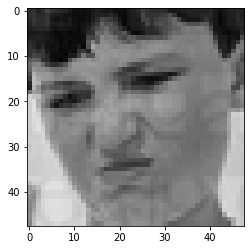

In [ ]:
display_stats(1,10018);

In [ ]:
#SEPARACION DE TRAIN Y TEST 
data_entrenamiento="/content/data/train"
data_validacion="/content/data/test"

# PREPROCESAMIENTO

In [ ]:
#PARAMETROS PARA LA NORMALIZACION DE LAS IMAGENES Y LA FASE DE ENTRENAMIENTO 
#Altura y longitud hacen referencia al tamano de la imagen altura=100 y longitud=100
#clases=7 ya que existen 7 clases disponibles para la clasificacion del dataset

altura, longitud=100,100
batch_size=32
filtrosConv1=32
filtrosConv2=64
tamano_filtro1=(3,3)
tamano_filtro2=(2,2)
tamano_pool=(2,2)
clases=7

In [ ]:
#PREPROCESAMIENTO DE IMAGENES
entrenamiento_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

In [ ]:
#VALIDACION
validacion_datagen=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
imagen_entrenamiento= entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura,longitud),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
imagen_validacion=validacion_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura,longitud),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df[["img_name","path","label"]], df["label"], test_size=0.2, stratify = df["label"], random_state = 754142)




# ARQUITECTURA RED NEURONAL CONVOLUCIONAL(EXPRECIS)

In [ ]:
#INICIAMOS EL MODELO RED REURONAL CNN
cnn = Sequential()
#Añadimos una capa convolucional con 32 filtros de 3píxeles de ancho x 3píxeles de altura. Vamos a aplicarlo a cada imagen. 
#Cada filtro sería de: 3x3.
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
#añadimos una capa de pooling de 2x2
cnn.add(MaxPooling2D(pool_size=tamano_pool))
#Añadimos una capa convolucional con 64 filtros de 3píxeles de ancho x 3píxeles de altura. Vamos a aplicarlo a cada imagen. 
#Cada filtro sería de: 2x2.
cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
#añadimos una capa de pooling de 2x2
cnn.add(MaxPooling2D(pool_size=tamano_pool))
#añadimos una capa para aplanar la estructura y convertir en una matriz
cnn.add(Flatten())
#añadimos una capa con 64 neuronas
cnn.add(Dense(64,activation='relu'))
#añadimos una capa con 32 neuronas
cnn.add(Dense(32,activation='sigmoid'))
#este dropout desactiva el 50% de las conexiones entre las neuronas, lo cual mejora los resultados
cnn.add(Dropout(0.5))
#en la última capa tiene que hacer tantas neuronas como clases haya, en este caso clases=7 
cnn.add(Dense(clases,activation='softmax'))
#compilamos el modelo
cnn.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
print(imagen_validacion)


# ENTRENAMIENTO CNN


In [ ]:
#Fase de training
#hacemos que la red recorra la fase de entrenamiento (epochs) 100 veces.
history=cnn.fit(imagen_entrenamiento,steps_per_epoch=100,epochs=100, validation_data=imagen_validacion,validation_steps=0.2)
#en 50 epochs aproximadamente: loss: 0.4032 - accuracy: 0.8588

Epoch 1/100
100/100 [==============================] - 38s 383ms/step - loss: 1.9596 - accuracy: 0.1828 - val_loss: 1.7997 - val_accuracy: 0.2812
Epoch 2/100
100/100 [==============================] - 38s 384ms/step - loss: 1.8458 - accuracy: 0.2303 - val_loss: 1.8090 - val_accuracy: 0.1875
Epoch 3/100
100/100 [==============================] - 38s 382ms/step - loss: 1.8122 - accuracy: 0.2525 - val_loss: 1.7681 - val_accuracy: 0.2812
Epoch 4/100
100/100 [==============================] - 38s 384ms/step - loss: 1.7935 - accuracy: 0.2537 - val_loss: 1.7764 - val_accuracy: 0.2812
Epoch 5/100
100/100 [==============================] - 38s 383ms/step - loss: 1.7868 - accuracy: 0.2525 - val_loss: 1.6708 - val_accuracy: 0.2500
Epoch 6/100
100/100 [==============================] - 38s 382ms/step - loss: 1.7708 - accuracy: 0.2731 - val_loss: 1.7385 - val_accuracy: 0.3750
Epoch 7/100
100/100 [==============================] - 38s 385ms/step - loss: 1.7537 - accuracy: 0.3009 - val_loss: 1.7087 -

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

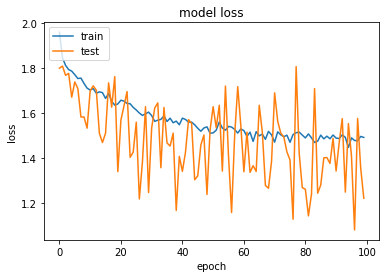

In [ ]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
import numpy
import os
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
#RESUMEN DE LA RED NEURONAL
cnn.summary()
#GUARDAR LOS PESOS Y EL MODELO DE LA RED NEURONAL
#cnn.save('/content/modelo/modelo.h5')
#cnn.save_weights('/content/modelo/pesos.h5')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2560064   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2560064   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
longitud,altura=100,100



In [ ]:
#FUNCION PARA RECIBIR UNA IMAGEN Y PREDECIR LA CLASE DE LA IMAGEN JUNTO CON LA PROBABILIDAD 
def predict(file):
  x=load_img(file,target_size=(100,100))
  x=img_to_array(x)
  x=np.expand_dims(x, axis=0)
  arreglo= loaded_model.predict(x)
  resultado= arreglo[0]
  maxElement = np.amax(resultado)
  MaxElement='%.2f'%(maxElement*100)
  respuesta=np.argmax(resultado)
  print("Con una probabilidad de "+MaxElement+"% esta: ")
  if respuesta==0:
    print('Enojado')
  elif respuesta==1:
    print('Asco')
  elif respuesta==2:
    print('Miedo')
  elif respuesta==3:
    print('Feliz')
  elif respuesta==4:
    print('Triste')
  elif respuesta==5:
    print('Sorprendido')
  elif respuesta==6:
    print('Neutral')
  return respuesta

In [ ]:
from google.colab import files
uploaded = files.upload();

Saving IMG_9432.jpg to IMG_9432.jpg


# NUEVAS PREDICCIONES

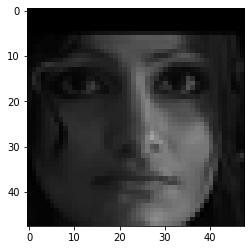

Con una probabilidad de 64.89% esta: 
Neutral


6

In [ ]:
img=cv2.imread("/content/data/test/6/32313.png")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
predict('/content/data/test/6/32313.png')

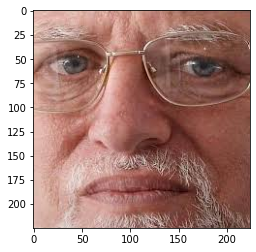

Con una probabilidad de 27.38% esta: 
Miedo


2

In [ ]:
img=cv2.imread("/content/849854.jpeg")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
predict('/content/849854.jpeg')

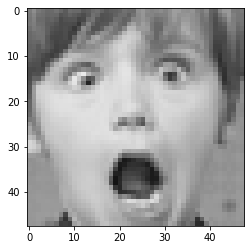

Con una probabilidad de 94.87% esta: 
Sorprendido


5

In [ ]:
img=cv2.imread("/content/data/test/5/32315.png")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
predict('/content/data/test/5/32315.png')

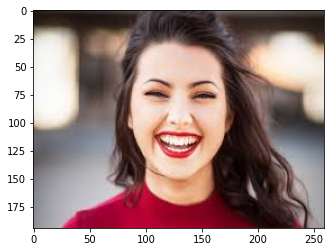

Con una probabilidad de 32.75% esta: 
Feliz


3

In [ ]:
img=cv2.imread("/content/felicidad.jpeg")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
predict('/content/felicidad.jpeg')

In [ ]:
#importamos el algoritmo cross validator, y un wrapper que permitirá usar modelos de keras con scikit learn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [ ]:
#1. Compilación: Prueba de mejores parámetros batch_size, epochs y optimizer
#Esto recomiendo probarlo con Google Colab, puesto que se necesita 16GB en RAM y puede llegar a tardar unos 30min.

def build_model(optimizer):
    
    cnn = Sequential()
    cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=tamano_pool))
    cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
    cnn.add(MaxPooling2D(pool_size=tamano_pool))
    cnn.add(Flatten())

    cnn.add(Dense(64, activation='relu'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(32, activation='sigmoid'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(clases, activation='softmax'))

    cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    return cnn

#parámetros que queremos probar, y sus valores 
#probaremos con batch_size, epochs, y optimizador, con el fin de encontrar la mejor combinación entre estos tres parámetros.
parameters = parameters = {'batch_size': [16,32],
             'epochs':[100,200],
             'optimizer': ['adadelta', 'rmsprop']}

estimator = KerasClassifier(build_fn=build_model, verbose=0)
#Ahora no le pasamos los parámetros al KerasClasifier, porque se los pasaremos a través de GridSearchCV
#el argumento verbose=0 es para que no muestre salida, si lo dejamos en cero, no mostrará la barra de progreso del entrenamiento
#GridSearchCV: recibe como parámetros nuestro modelo, nuestros parámetros, la medida sobre la que queremos comparar, y la 
#cantidad de veces que lo entrenará para sacar la media de accuracy.
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=10,n_jobs=-1)
grid_search.fit(X_train,y_train)
#grid_search.best_params_
print(grid_search.best_params_)
#Un ejemplo de resultados es: {'batch_size': 16, 'epochs': 100, 'optimizer': 'rmsprop'}
#Esto indica que el optimizador "adadelta" no es adecuado. Y es que este optimizador NO sirve para este tipo de problemas.

   {'batch_size': 32, 'epochs': 100, 'optimizer': 'adadelta'}

In [ ]:
#2. Densidad de las capas de neuronas
#Notemos que se incluyen los mejores parámetros del paso de optimización anterior (batch_size, epochs y optimizer)
#Esto recomiendo probarlo con Google Colab, puesto que se necesita 16GB en RAM y puede llegar a tardar unos 30min.
def build_model(l1, l2):
    cnn = Sequential()
    cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=tamano_pool))
    cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
    cnn.add(MaxPooling2D(pool_size=tamano_pool))
    cnn.add(Flatten())

    cnn.add(Dense(64, activation='relu'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(32, activation='sigmoid'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(clases, activation='softmax'))

    cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    return cnn

parameters = parameters = {'l1':[16,32,64,128],
                           'l2':[16,32,64,128]}

estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=32, epochs=100)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=10,n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(grid_search.best_params_)

#Resultados: {'l1': 32, 'l2': 16}
#Los resultados indican que hubo un error en la red original, las capas van desde la más densa, a la menos densa.

{'l1': 16, 'l2': 16}

In [ ]:
#3. Proceso con dropouts: apagar un porcentaje de neuronas al azar con el fin de que las neuronas no se vuelvan tan 
#dependientes de los datos.
##Esto recomiendo probarlo con Google Colab, puesto que se necesita 16GB en RAM y puede llegar a tardar unos 30min.
def build_model(d1, d2):
    cnn = Sequential()
    cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=tamano_pool))
    cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
    cnn.add(MaxPooling2D(pool_size=tamano_pool))
    cnn.add(Flatten())

    cnn.add(Dense(16, activation='relu'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(16, activation='sigmoid'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(clases, activation='softmax'))

    cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    return cnn

parameters = parameters = {'d1':[0.1,0.2,0.3],
                            'd2':[0.1,0.2,0.3]}

estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=32, epochs=100)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=10,n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(grid_search.best_params_)

#Resultados: {'d1':0.2, 'd2':0.3}

{'d1': 0.1, 'd2': 0.1}

In [ ]:
#Evaluación del Modelo Final

finalModel = Sequential()
#Finalmente, veamos como mejoró nuestro modelo, vamos a repetir el proceso de la validación cruzada.
#Esto puede probarse localmente. Ya con los mejores parámetros evaluamos la red neuronal. Puede tardar un minuto.
def build_model():
    cnn = Sequential()
    cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=tamano_pool))
    cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
    cnn.add(MaxPooling2D(pool_size=tamano_pool))
    cnn.add(Flatten())

    cnn.add(Dense(64, activation='relu'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(32, activation='sigmoid'))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(clases, activation='softmax'))

    cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
    return cnn

estimator = KerasClassifier(build_fn=build_model, verbose=1, batch_size=16, epochs=100)
accuracies = cross_val_score(estimator, X_train, y_train, cv=10, n_jobs=-1)
mean_acc = accuracies.mean()
std_acc = accuracies.std()
print('accuracies: ')
print(accuracies)
print('Precisión media: ', mean_acc)
print('Desviación media: ',std_acc)
#Y el resultado es:
#Precision media aprox.: 0.8067
#Pasamos de un 50% precisión a un 80% de precisión, por lo que se recomienda: 
#hacer siempre el proceso de fine tunning, porque ayudará a crear modelos correctos en la mayoría de los casos.

model=build_model() 
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
model.summary()

score = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#Fase de Testing
print('Resultado en Test:')
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
#GUARDAR LOS PESOS Y EL MODELO DE LA RED NEURONAL
#cnn.save('/content/modelo/modelooptimizado.h5')
#cnn.save_weights('/content/modelo/pesosoptimizado.h5')

accuracies: 
[0.77499998 0.92500001 0.85000002 0.82051283 0.84615386 0.84615386
 0.64102566 0.84615386 0.82051283 0.66666669]
Precisión media:  0.8037179589271546
Desviación media:  0.08300269539653761

In [ ]:
#Modelo Base
print('MODELO BASE')
nombreArchivoModelo='arquitectura_base'
nombreArchivoPesos='pesos_base'
Selectedmodel=cargarRNN(nombreArchivoModelo,nombreArchivoPesos) 

#Selectedmodel.summary()

Selectedmodel.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['acc']) #ADADELTA: An Adaptive Learning Rate Method
print('Resultado en Train:')
score = Selectedmodel.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (Selectedmodel.metrics_names[1], score[1]*100))

#Fase de Testing
print('Resultado en Test:')
score = Selectedmodel.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (Selectedmodel.metrics_names[1], score[1]*100))

#Modelo optimizado
print('MODELO OPTIMIZADO')
nombreArchivoModelo='arquitectura_optimizada'
nombreArchivoPesos='pesos_optimizados'
Selectedmodel=cargarRNN(nombreArchivoModelo,nombreArchivoPesos)    

#Selectedmodel.summary()

Selectedmodel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc']) #ADADELTA: An Adaptive Learning Rate Method
print('Resultado en Train:')
score = Selectedmodel.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (Selectedmodel.metrics_names[1], score[1]*100))

#Fase de Testing
print('Resultado en Test:')
score = Selectedmodel.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (Selectedmodel.metrics_names[1], score[1]*100))

MODELO OPTIMIZADO
Red Neuronal Cargada desde Archivo
Resultado en Train:
acc: 83.46%
Resultado en Test:
acc: 81.82%

MODELO OPTIMIZADO
Red Neuronal Cargada desde Archivo
Resultado en Train:
acc: 83.46%
Resultado en Test:
acc: 81.82%





# CONCLUSION


**CONCLUSION**

En este estudio se ha analizado la clasificación de expresiones faciales implementando el preprocesamiento y una red neuronal convolucional para obtener nuevas predicciones de las distintas categorías de expresiones como: enojado, disgusto, miedo, feliz, neutral, triste y sorprendido.Los experientos realizados con el preprocesamiento y la extracción de características de la red neuronal convolucional se obtiene buenos resultados optimizando el tiempo consecuencia de la reducción del numero de capas, teniendo en cuenta que se ah mejorado un 10.25 en valor porcentual el accuracy en base al articulo \cite{c1} logrando un 68.75, aunque todavía existe un grado de complejidad relativo ya que los distintos expresiones faciales tienen características similares entre si por lo cual es importante realizar un estudio comparativo entre varios modelos para complementar nuestro estudio.